# some experimenting with dataset

installing and importing libraries

In [ ]:
!pip install pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-3229ebae-ab6e-4fb4-8ce5-dbc53adccd30/bin/python -m pip install --upgrade pip' command.


In [ ]:
df=pd.read_csv('/dbfs/FileStore/tables/market.csv')
df['stay_date']=pd.to_datetime(df['stay_date']) # converting stay_data to datetime type for better handling
df.describe()

,occ,adr,revpar
count,1401.000000,1401.000000,1401.000000
mean,0.590814,228.738633,158.678388
std,0.344515,84.568521,118.913296
min,0.022706,103.380565,2.712649
25%,0.202607,140.459131,25.532530
50%,0.731095,229.762673,162.055643
75%,0.920651,289.312420,253.709687
max,1.045192,527.157875,544.524998


In [ ]:
df=df.set_index('stay_date').drop(['adr','revpar'],axis=1) # setting index as dates
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['occ'])
results.plot()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-429813864604000>:3
      1 df=df.set_index('stay_date').drop(['adr','revpar'],axis=1) # setting index as dates
      2 from statsmodels.tsa.seasonal import seasonal_decompose
----> 3 results = seasonal_decompose(df['occ'])
      4 results.plot()

File /databricks/python/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py:159, in seasonal_decompose(x, model, filt, period, two_sided, extrapolate_trend)
    157         period = pfreq
    158     else:
--> 159         raise ValueError(
    160             "You must specify a period or x must be a pandas object with "
    161             "a PeriodIndex or a DatetimeIndex with a freq not set to None"
    162         )
    163 if x.shape[0] < 2 * pfreq:
    164     raise ValueError(
    165         f"x must have 2 complete cycles requires {2 * pfreq} "
    166         f"obser

if you look at the above error it says there is missing data in stay_data,so inorder to use seasonal_decompose we need continouse frequency of data

reference:- https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be

In [ ]:
df=pd.read_csv('/dbfs/FileStore/tables/market.csv')
df['stay_date']=pd.to_datetime(df['stay_date']) # converting stay_data to datetime type for better handling
df.describe()
pd.date_range(start =df['stay_date'][0], end =df['stay_date'].iloc[-1]).difference(df['stay_date'])

Out[197]: DatetimeIndex(['2020-12-20'], dtype='datetime64[ns]', freq=None)

there is a missing data of 2020-12-20 in stay_data column lets add it with mean of other columns and sort it 

In [ ]:
df.shape

Out[199]: (1401, 4)

In [ ]:
df1=df

In [ ]:
df1

,stay_date,occ,adr,revpar
0,2018-03-01,0.874524,215.932333,188.838079
1,2018-03-02,0.899531,197.135094,177.329213
2,2018-03-03,0.838585,201.118114,168.654686
3,2018-03-04,0.762481,212.537298,162.055643
4,2018-03-05,0.831692,253.831953,211.110073
...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469
1397,2021-12-28,0.554664,332.491924,184.421176
1398,2021-12-29,0.530664,339.950188,180.399286
1399,2021-12-30,0.596610,362.866735,216.489797


In [ ]:
#adding row to dataframe and cheking again missing dates
df1.loc[len(df1)]=[pd.to_datetime('2020-12-20'),df1['occ'].mean(),df1['adr'],df1['revpar']]
df1=df1.sort_values(by='stay_date')
pd.date_range(start =df1['stay_date'][0], end =df1['stay_date'].iloc[-1]).difference(df1['stay_date'])

Out[202]: DatetimeIndex([], dtype='datetime64[ns]', freq='D')

performing seasonal_decompose again 

In [ ]:
df1.dropna()

,stay_date,occ,adr,revpar
0,2018-03-01,0.874524,215.932333,188.838079
1,2018-03-02,0.899531,197.135094,177.329213
2,2018-03-03,0.838585,201.118114,168.654686
3,2018-03-04,0.762481,212.537298,162.055643
4,2018-03-05,0.831692,253.831953,211.110073
...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469
1397,2021-12-28,0.554664,332.491924,184.421176
1398,2021-12-29,0.530664,339.950188,180.399286
1399,2021-12-30,0.596610,362.866735,216.489797


In [ ]:
df1=df1.set_index('stay_date').drop(['adr','revpar'],axis=1) # setting index as dates

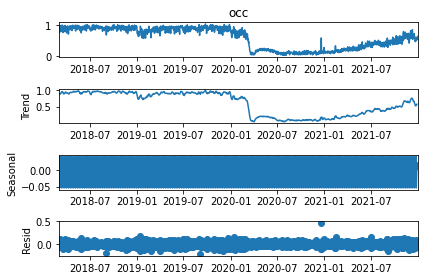

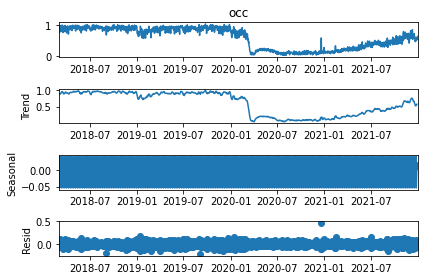

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df1['occ'])
results.plot()

if u see now seasonal_decompose works now ,beacuse we filled the missed data which acts as frquency 


# EDA

lets back to original data and do some analyasis EDA

In [ ]:
df=pd.read_csv('/dbfs/FileStore/tables/market.csv')
df['stay_date']=pd.to_datetime(df['stay_date'])
df

,stay_date,occ,adr,revpar
0,2018-03-01,0.874524,215.932333,188.838079
1,2018-03-02,0.899531,197.135094,177.329213
2,2018-03-03,0.838585,201.118114,168.654686
3,2018-03-04,0.762481,212.537298,162.055643
4,2018-03-05,0.831692,253.831953,211.110073
...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469
1397,2021-12-28,0.554664,332.491924,184.421176
1398,2021-12-29,0.530664,339.950188,180.399286
1399,2021-12-30,0.596610,362.866735,216.489797


In [ ]:
#adding an column day to represent whihc data it is ,0 to 6, monday to sunday ,0,for monday
df['days']=pd.to_datetime(df['stay_date']).dt.dayofweek
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] # useful for mapping 0 to monday
number=[0,1,2,3,4,5,6]
abc=dict(zip(number,weekDays))
abc

Out[210]: {0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [ ]:
df['days_rep']=df['days'].map(abc)
df

,stay_date,occ,adr,revpar,days,days_rep
0,2018-03-01,0.874524,215.932333,188.838079,3,Thursday
1,2018-03-02,0.899531,197.135094,177.329213,4,Friday
2,2018-03-03,0.838585,201.118114,168.654686,5,Saturday
3,2018-03-04,0.762481,212.537298,162.055643,6,Sunday
4,2018-03-05,0.831692,253.831953,211.110073,0,Monday
...,...,...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469,0,Monday
1397,2021-12-28,0.554664,332.491924,184.421176,1,Tuesday
1398,2021-12-29,0.530664,339.950188,180.399286,2,Wednesday
1399,2021-12-30,0.596610,362.866735,216.489797,3,Thursday


In [ ]:
df

,stay_date,occ,adr,revpar,days,days_rep
0,2018-03-01,0.874524,215.932333,188.838079,3,Thursday
1,2018-03-02,0.899531,197.135094,177.329213,4,Friday
2,2018-03-03,0.838585,201.118114,168.654686,5,Saturday
3,2018-03-04,0.762481,212.537298,162.055643,6,Sunday
4,2018-03-05,0.831692,253.831953,211.110073,0,Monday
...,...,...,...,...,...,...
1396,2021-12-27,0.604845,325.360273,196.792469,0,Monday
1397,2021-12-28,0.554664,332.491924,184.421176,1,Tuesday
1398,2021-12-29,0.530664,339.950188,180.399286,2,Wednesday
1399,2021-12-30,0.596610,362.866735,216.489797,3,Thursday


In [ ]:
# checking count of each day
df['days_rep'].value_counts()

Out[213]: Thursday     201
Friday       201
Saturday     200
Monday       200
Tuesday      200
Wednesday    200
Sunday       199
Name: days_rep, dtype: int64

In [ ]:
#checking mean,std,var on respective all days in dataset
for i in range(7):
    print(weekDays[i])
    print('mean occupancy on',weekDays[i],df[df['days']==i]['occ'].mean())
    print('standard deviation on ',weekDays[i],df[df['days']==i]['occ'].std())
    print('varience  on',weekDays[i],df[df['days']==i]['occ'].var())
    
    
    

Monday
mean occupancy on Monday 0.56956996244
standard deviation on  Monday 0.34566818619211687
varience  on Monday 0.11948649494534798
Tuesday
mean occupancy on Tuesday 0.5919079880499999
standard deviation on  Tuesday 0.36140097484716627
varience  on Tuesday 0.1306106646204821
Wednesday
mean occupancy on Wednesday 0.5995937450000001
standard deviation on  Wednesday 0.3612767358122661
varience  on Wednesday 0.1305208798391659
Thursday
mean occupancy on Thursday 0.59373205639801
standard deviation on  Thursday 0.35071072392075814
varience  on Thursday 0.12299801187302223
Friday
mean occupancy on Friday 0.6127487415074627
standard deviation on  Friday 0.33545504440879986
varience  on Friday 0.1125300868193099
Saturday
mean occupancy on Saturday 0.6312592670849999
standard deviation on  Saturday 0.3422089343943532
varience  on Saturday 0.11710695477931872
Sunday
mean occupancy on Sunday 0.5364928417688442
standard deviation on  Sunday 0.3089158679378925
varience  on Sunday 0.095429013463

In [ ]:
df=df.set_index('stay_date').drop(['days_rep'],axis=1)
df

,occ,adr,revpar,days
stay_date,,,,
2018-03-01,0.874524,215.932333,188.838079,3
2018-03-02,0.899531,197.135094,177.329213,4
2018-03-03,0.838585,201.118114,168.654686,5
2018-03-04,0.762481,212.537298,162.055643,6
2018-03-05,0.831692,253.831953,211.110073,0
...,...,...,...,...
2021-12-27,0.604845,325.360273,196.792469,0
2021-12-28,0.554664,332.491924,184.421176,1
2021-12-29,0.530664,339.950188,180.399286,2


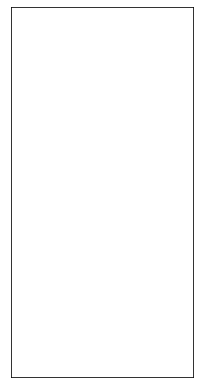

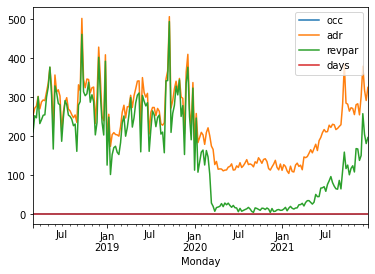

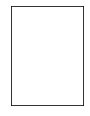

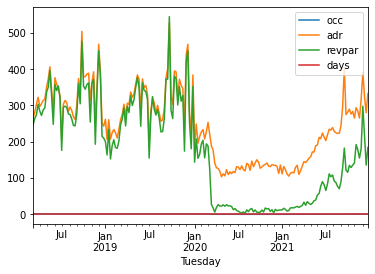

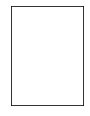

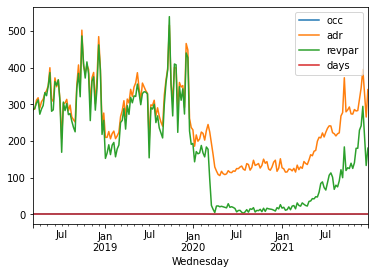

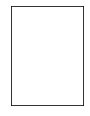

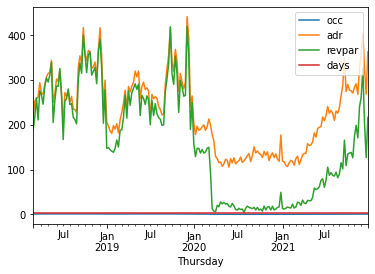

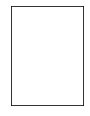

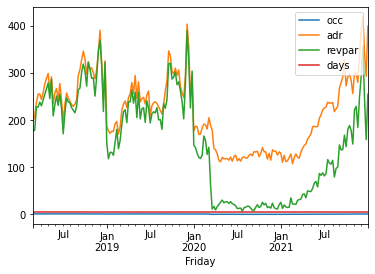

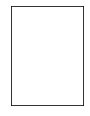

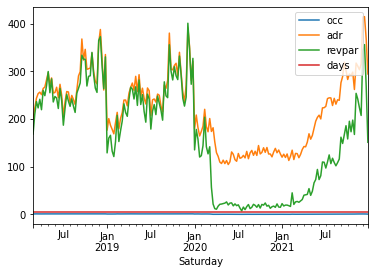

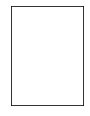

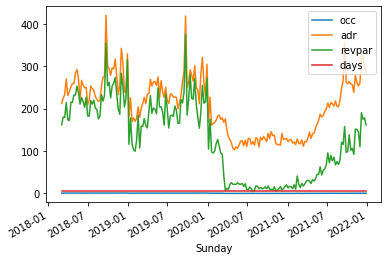

In [ ]:
plt.figure(figsize=(15,15))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    df[df['days']==i].plot()
    plt.xlabel(weekDays[i])
    plt.show()

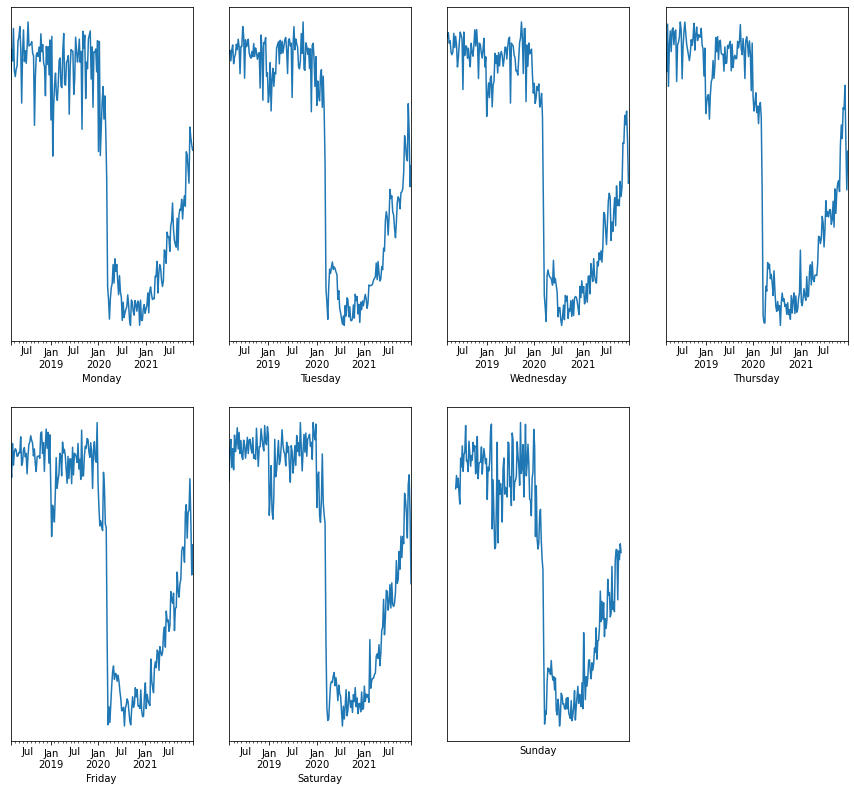

In [ ]:
plt.figure(figsize=(15,15))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    df[df['days']==i]['occ'].plot()
    plt.xlabel(weekDays[i])
plt.show()

In [ ]:
result=adfuller (df['occ'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -1.355213
p-value: 0.603550
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


observations 

1) data set is not stationary 

2) there is seasonlaity 

3) mean of  evey day is amlost same


In [ ]:
len(df)

Out[220]: 1401

In [ ]:
#df=df.drop(['adf','revpar','days'],axis=1)

splitting data 70%train and test 30%

In [ ]:
train_percentage=round(70/100*len(df))
train_percentage

train = df.iloc[:train_percentage]
test = df.iloc[train_percentage:]

In [ ]:
train.tail()

,occ,adr,revpar,days
stay_date,,,,
2020-11-01,0.113358,137.404062,15.575864,6
2020-11-02,0.119265,135.458571,16.155476,0
2020-11-03,0.105376,141.492104,14.909833,1
2020-11-04,0.115742,143.628281,16.623797,2
2020-11-05,0.117715,139.530790,16.424921,3


In [ ]:
test.head()

,occ,adr,revpar,days
stay_date,,,,
2020-11-06,0.122020,117.350417,14.319141,4
2020-11-07,0.150022,126.673470,19.003810,5
2020-11-08,0.051825,119.011477,6.167762,6
2020-11-09,0.113953,117.256178,13.361653,0
2020-11-10,0.119127,132.792871,15.819275,1


fitting auto armia to get best parameters

In [ ]:
stepwise_fit = auto_arima(train['occ'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2500.403, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2243.211, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2331.232, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2462.110, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2245.112, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2503.246, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2505.988, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2503.988, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2500.106, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2505.874, Time=1.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2506.357, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2462.953, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2504.358, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-2504.358, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0

In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train['occ'],order=(0,1,2))
model=model.fit()
model.summary()

SARIMAX Results 
 
 Dep. Variable: occ No. Observations: 981 
 
 
 Model: ARIMA(0, 1, 2) Log Likelihood 1256.179 
 
 
 Date: Thu, 01 Dec 2022 AIC -2506.357 
 
 
 Time: 17:02:13 BIC -2491.695 
 
 
 Sample: 03-01-2018 HQIC -2500.779 
 
 
 - 11-05-2020 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ma.L1 -0.5123 0.028 -18.558 0.000 -0.566 -0.458 
 
 
 ma.L2 -0.2034 0.029 -6.979 0.000 -0.261 -0.146 
 
 
 sigma2 0.0045 0.000 28.619 0.000 0.004 0.005 
 
 
 
 
 Ljung-Box (L1) (Q): 0.00 Jarque-Bera (JB): 170.43 
 
 
 Prob(Q): 0.94 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.86 Skew: -0.81 
 
 
 Prob(H) (two-sided): 0.19 Kurtosis: 4.26 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Out[227]: <AxesSubplot:xlabel='stay_date'>

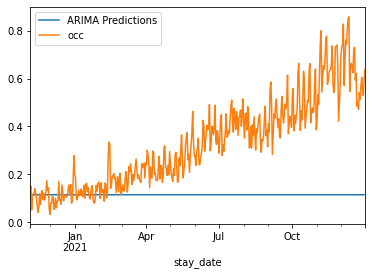

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#pred.index=pd.date_range(start='2021-09-22',end='2021-12-31') # use this if predict not return dates as indexs
pred.plot(legend=True)
test['occ'].plot(legend=True)

our model is not performing well ,lets try with another hyper parameter techniques

In [ ]:
test

,occ,adr,revpar,days
stay_date,,,,
2020-11-06,0.122020,117.350417,14.319141,4
2020-11-07,0.150022,126.673470,19.003810,5
2020-11-08,0.051825,119.011477,6.167762,6
2020-11-09,0.113953,117.256178,13.361653,0
2020-11-10,0.119127,132.792871,15.819275,1
...,...,...,...,...
2021-12-27,0.604845,325.360273,196.792469,0
2021-12-28,0.554664,332.491924,184.421176,1
2021-12-29,0.530664,339.950188,180.399286,2


In [ ]:
pred

Out[229]: 2020-11-06    0.115325
2020-11-07    0.114819
2020-11-08    0.114819
2020-11-09    0.114819
2020-11-10    0.114819
                ...   
2021-12-26    0.114819
2021-12-27    0.114819
2021-12-28    0.114819
2021-12-29    0.114819
2021-12-30    0.114819
Freq: D, Name: ARIMA Predictions, Length: 420, dtype: float64

In [ ]:
error = mean_squared_error(test['occ'], pred)
print(error)

0.08170053765333267


finding parameters using mean square error , 

In [ ]:
p_values = [0, 1]
d_values = range(0, 2)
q_values = range(0, 2)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = sm.tsa.arima.ARIMA(train['occ'], order=order).fit()
            predictions = model.predict(start=len(train),end=len(train) + len(test)-1)
            error = mean_squared_error(test['occ'], predictions)
            print('ARIMA%s MSE=%.3f' % (order,error))

ARIMA(0, 0, 0) MSE=0.174
ARIMA(0, 0, 1) MSE=0.173
ARIMA(0, 1, 0) MSE=0.080
ARIMA(0, 1, 1) MSE=0.081
ARIMA(1, 0, 0) MSE=0.118
ARIMA(1, 0, 1) MSE=0.019
ARIMA(1, 1, 0) MSE=0.081
ARIMA(1, 1, 1) MSE=0.082


In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train['occ'],order=(1,0,1))
model=model.fit()
model.summary()

SARIMAX Results 
 
 Dep. Variable: occ No. Observations: 981 
 
 
 Model: ARIMA(1, 0, 1) Log Likelihood 1233.504 
 
 
 Date: Thu, 01 Dec 2022 AIC -2459.008 
 
 
 Time: 17:02:16 BIC -2439.454 
 
 
 Sample: 03-01-2018 HQIC -2451.569 
 
 
 - 11-05-2020 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const 0.5957 0.335 1.779 0.075 -0.061 1.252 
 
 
 ar.L1 0.9981 0.003 368.883 0.000 0.993 1.003 
 
 
 ma.L1 -0.6705 0.019 -35.557 0.000 -0.707 -0.634 
 
 
 sigma2 0.0047 0.000 24.973 0.000 0.004 0.005 
 
 
 
 
 Ljung-Box (L1) (Q): 21.62 Jarque-Bera (JB): 120.15 
 
 
 Prob(Q): 0.00 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.83 Skew: -0.69 
 
 
 Prob(H) (two-sided): 0.10 Kurtosis: 4.02 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Out[233]: <AxesSubplot:xlabel='stay_date'>

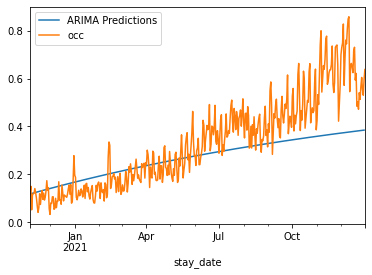

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#pred.index=pd.date_range(start='2021-09-22',end='2021-12-31') # use this if predict not return dates as indexs
pred.plot(legend=True)
test['occ'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['occ'], pred)
print(error)

0.018938975758072244


better compared with previouse one 

In [ ]:
train

,occ,adr,revpar,days
stay_date,,,,
2018-03-01,0.874524,215.932333,188.838079,3
2018-03-02,0.899531,197.135094,177.329213,4
2018-03-03,0.838585,201.118114,168.654686,5
2018-03-04,0.762481,212.537298,162.055643,6
2018-03-05,0.831692,253.831953,211.110073,0
...,...,...,...,...
2020-11-01,0.113358,137.404062,15.575864,6
2020-11-02,0.119265,135.458571,16.155476,0
2020-11-03,0.105376,141.492104,14.909833,1


this we are using auto arima for finding both order and seasonal parameters,here i taken 24 as seasonal component ,i experimented with 6,12,24,4

In [ ]:
import pmdarima as pm


In [ ]:
stepwise_fit = pm.auto_arima(train['occ'], start_p=1, start_q=1, max_p=3, max_q=3, m=24,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True,scoring='mse')  # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=18.19 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=-1570.382, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=-1846.252, Time=2.79 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=10.88 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=-1650.172, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=-1920.223, Time=8.44 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=41.30 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=12.53 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=-1854.248, Time=4.92 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=-2007.200, Time=11.30 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=-1891.960, Time=4.67 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=54.57 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=15.25 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=-2050.030, Time=7.90 sec
 ARIMA(3,1,0)(1,1,0)[24]          

SARIMAX Results 
 
 Dep. Variable: y No. Observations: 981 
 
 
 Model: SARIMAX(2, 1, 3)x(2, 1, [], 24) Log Likelihood 1090.772 
 
 
 Date: Thu, 01 Dec 2022 AIC -2165.544 
 
 
 Time: 16:57:47 BIC -2126.642 
 
 
 Sample: 03-01-2018 HQIC -2150.726 
 
 
 - 11-05-2020 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 -0.4697 0.029 -16.431 0.000 -0.526 -0.414 
 
 
 ar.L2 -0.8595 0.027 -31.325 0.000 -0.913 -0.806 
 
 
 ma.L1 -0.1112 0.034 -3.239 0.001 -0.178 -0.044 
 
 
 ma.L2 0.3686 0.034 10.956 0.000 0.303 0.435 
 
 
 ma.L3 -0.6482 0.026 -25.243 0.000 -0.699 -0.598 
 
 
 ar.S.L24 -0.7459 0.031 -24.174 0.000 -0.806 -0.685 
 
 
 ar.S.L48 -0.3853 0.028 -13.519 0.000 -0.441 -0.329 
 
 
 sigma2 0.0059 0.000 23.521 0.000 0.005 0.006 
 
 
 
 
 Ljung-Box (L1) (Q): 7.56 Jarque-Bera (JB): 54.80 
 
 
 Prob(Q): 0.01 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.95 Skew: -0.48 
 
 
 Prob(H) (two-sided): 0.62 Kurtosis: 3.66 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [ ]:
stepwise_fit.seasonal_order

Out[173]: (2, 1, 0, 24)

In [ ]:
stepwise_fit.get_params

Out[174]: <bound method BaseEstimator.get_params of ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 24),
      suppress_warnings=True, with_intercept=False)>

In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train['occ'],order=(2,1,3),seasonal_order=(2, 1, 0, 24))
model=model.fit()
model.summary()

SARIMAX Results 
 
 Dep. Variable: occ No. Observations: 981 
 
 
 Model: ARIMA(2, 1, 3)x(2, 1, [], 24) Log Likelihood 1090.772 
 
 
 Date: Thu, 01 Dec 2022 AIC -2165.544 
 
 
 Time: 17:03:33 BIC -2126.642 
 
 
 Sample: 03-01-2018 HQIC -2150.726 
 
 
 - 11-05-2020 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 -0.4697 0.029 -16.431 0.000 -0.526 -0.414 
 
 
 ar.L2 -0.8595 0.027 -31.325 0.000 -0.913 -0.806 
 
 
 ma.L1 -0.1112 0.034 -3.239 0.001 -0.178 -0.044 
 
 
 ma.L2 0.3686 0.034 10.956 0.000 0.303 0.435 
 
 
 ma.L3 -0.6482 0.026 -25.243 0.000 -0.699 -0.598 
 
 
 ar.S.L24 -0.7459 0.031 -24.174 0.000 -0.806 -0.685 
 
 
 ar.S.L48 -0.3853 0.028 -13.519 0.000 -0.441 -0.329 
 
 
 sigma2 0.0059 0.000 23.521 0.000 0.005 0.006 
 
 
 
 
 Ljung-Box (L1) (Q): 7.56 Jarque-Bera (JB): 54.80 
 
 
 Prob(Q): 0.01 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.95 Skew: -0.48 
 
 
 Prob(H) (two-sided): 0.62 Kurtosis: 3.66 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Out[237]: <AxesSubplot:xlabel='stay_date'>

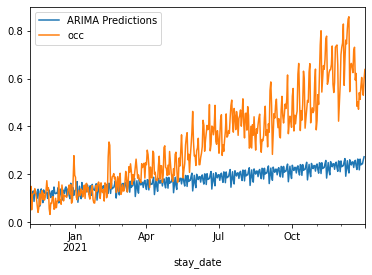

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#pred.index=pd.date_range(start='2021-09-22',end='2021-12-31') # use this if predict not return dates as indexs
pred.plot(legend=True)
test['occ'].plot(legend=True)

i cant say best ,but it performs better then previouse

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['occ'], pred)
print(error)

0.046460125259258675


# forecast futer for not 30 days 

Out[239]: <AxesSubplot:>

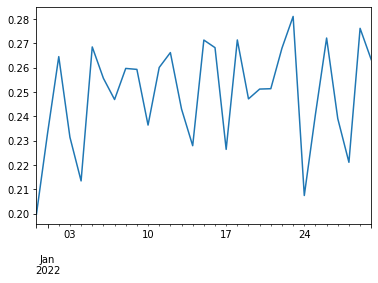

In [ ]:
predictions=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
predictions.plot()

In [ ]:
df

,occ,adr,revpar,days
stay_date,,,,
2018-03-01,0.874524,215.932333,188.838079,3
2018-03-02,0.899531,197.135094,177.329213,4
2018-03-03,0.838585,201.118114,168.654686,5
2018-03-04,0.762481,212.537298,162.055643,6
2018-03-05,0.831692,253.831953,211.110073,0
...,...,...,...,...
2021-12-27,0.604845,325.360273,196.792469,0
2021-12-28,0.554664,332.491924,184.421176,1
2021-12-29,0.530664,339.950188,180.399286,2


# converting non Stationary daty to Stationary data using square root

In [ ]:
df_log=np.sqrt(df['occ'])
df_diff=df_log.diff().dropna()

In [ ]:
df_diff=pd.DataFrame(df_diff,columns=['occ'])

In [ ]:
train_percentage=round(70/100*len(df))
train_percentage

train = df_diff.iloc[:train_percentage]
test = df_diff.iloc[train_percentage:]

In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train['occ'],order=(1,0,1),seasonal_order=(2, 1, 0, 12))
model=model.fit()
model.summary()

SARIMAX Results 
 
 Dep. Variable: occ No. Observations: 981 
 
 
 Model: ARIMA(1, 0, 1)x(2, 1, [], 12) Log Likelihood 1439.815 
 
 
 Date: Thu, 01 Dec 2022 AIC -2869.630 
 
 
 Time: 16:58:22 BIC -2845.249 
 
 
 Sample: 03-02-2018 HQIC -2860.349 
 
 
 - 11-06-2020 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 0.1939 0.051 3.793 0.000 0.094 0.294 
 
 
 ma.L1 -0.7096 0.030 -23.870 0.000 -0.768 -0.651 
 
 
 ar.S.L12 -0.6518 0.030 -21.725 0.000 -0.711 -0.593 
 
 
 ar.S.L24 -0.3327 0.028 -11.973 0.000 -0.387 -0.278 
 
 
 sigma2 0.0030 0.000 25.992 0.000 0.003 0.003 
 
 
 
 
 Ljung-Box (L1) (Q): 0.09 Jarque-Bera (JB): 43.86 
 
 
 Prob(Q): 0.77 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 2.65 Skew: -0.31 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 3.85 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Out[186]: <AxesSubplot:xlabel='stay_date'>

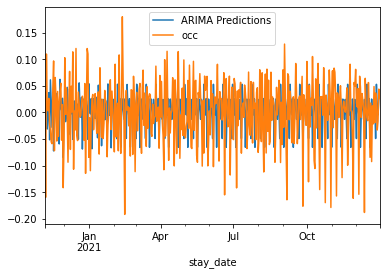

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
#pred.index=pd.date_range(start='2021-09-22',end='2021-12-31') # use this if predict not return dates as indexs
pred.plot(legend=True)
test['occ'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['occ'], pred)
print(error)

0.00467320426830365


after converting to Stationary , model performs well 

## Forcast future next 30 days by converting non Stationary to Stationary data

In [ ]:
predictions=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')

Out[189]: <AxesSubplot:>

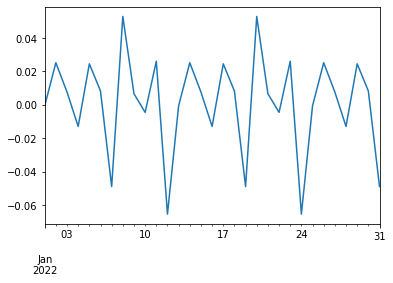

In [ ]:
predictions.plot()

## final observaions

**our ARIMA model performs good , but perfomance can improved by more hypertuning , lstm and facebook prophet perfoms well then compared with ARIMA because they can handle trend and seasonality in data**